컨볼루션 신경망은 다층 퍼셉트론 신경망과 매우 유사하나 이미지가 가지고 있는 특성이 고려되어 설계된 신경망이기에 영상 처리에 주로 사용됩니다. 컨볼루션 신경망 모델의 주요 레이어는 컨볼루션(Convolution) 레이어, 맥스풀링(Max Pooling) 레이어, 플래튼(Flatten) 레이어이며, 각 레이어별로 레이어 구성 및 역할에 대해서 알아보겠습니다.

---

### 필터로 특징을 뽑아주는 컨볼루션(Convolution) 레이어

케라스에서 제공되는 컨볼루션 레이어 종류에도 여러가지가 있으나 영상 처리에 주로 사용되는 Conv2D 레이어를 살펴보겠습니다. 레이어는 영상 인식에 주로 사용되며, 필터가 탑재되어 있습니다. 아래는 Conv2D 클래스 사용 예제입니다.

    Conv2D(32, (5, 5), padding='valid', input_shape=(28, 28, 1), activation='relu')
    
주요 인자는 다음과 같습니다.
* 첫번째 인자 : 컨볼루션 필터의 수 입니다.
* 두번째 인자 : 컨볼루션 커널의 (행, 열) 입니다.
* padding : 경계 처리 방법을 정의합니다.
    * 'valid' : 유효한 영역만 출력이 됩니다. 따라서 출력 이미지 사이즈는 입력 사이즈보다 작습니다.
    * 'same' : 출력 이미지 사이즈가 입력 이미지 사이즈와 동일합니다.
* input_shape : 샘플 수를 제외한 입력 형태를 정의 합니다. 모델에서 첫 레이어일 때만 정의하면 됩니다. 
    * (행, 열, 채널 수)로 정의합니다. 흑백영상인 경우에는 채널이 1이고, 컬러(RGB)영상인 경우에는 채널을 3으로 설정합니다. 
* activation : 활성화 함수 설정합니다.
    * 'linear' : 디폴트 값, 입력뉴런과 가중치로 계산된 결과값이 그대로 출력으로 나옵니다.
    * 'relu' : rectifier 함수, 은익층에 주로 쓰입니다.
    * 'sigmoid' : 시그모이드 함수, 이진 분류 문제에서 출력층에 주로 쓰입니다.
    * 'softmax' : 소프트맥스 함수, 다중 클래스 분류 문제에서 출력층에 주로 쓰입니다.

입력 형태는 다음과 같습니다. 
* image_data_format이 'channels_first'인 경우 (샘플 수, 채널 수, 행, 열)로 이루어진 4D 텐서입니다.
* image_data_format이 'channels_last'인 경우 (샘플 수, 행, 열, 채널 수)로 이루어진 4D 텐서입니다.

    image_data_format 옵션은 "keras.json" 파일 안에 있는 설정입니다. 콘솔에서 "vi ~/.keras/keras.json"으로 keras.json 파일 내용을 변경할 수 있습니다. 

출력 형태는 다음과 같습니다.
* image_data_format이 'channels_first'인 경우 (샘플 수, 필터 수, 행, 열)로 이루어진 4D 텐서입니다.
* image_data_format이 'channels_last'인 경우 (샘플 수, 행, 열, 필터 수)로 이루어진 4D 텐서입니다.
* 행과 열의 크기는 padding가 'same'인 경우에는 입력 형태의 행과 열의 크기가 동일합니다.

간단한 예제로 컨볼루션 레이어와 필터에 대해서 알아보겠습니다. 입력 이미지는 채널 수가 1, 너비가 3 픽셀, 높이가 3 픽셀이고, 크기가 2 x 2인 필터가 하나인 경우를 레이어로 표시하면 다음과 같습니다. 단 image_data_format이 'channels_last'인 경우 입니다.

    Conv2D(1, (2, 2), padding='valid', input_shape=(3, 3, 1))
    
이를 도식화하면 다음과 같습니다.

![lego_1](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_1.png)

필터는 가중치를 의미합니다. 하나의 필터가 입력 이미지를 순회하면서 적용된 결과값을 모으면 출력 이미지가 생성됩니다. 여기에는 두 가지 특성이 있습니다. 
* 하나의 필터로 입력 이미지를 순회하기 때문에 순회할 때 적용되는 가중치는 모두 동일합니다. 이를 파라미터 공유라고 부릅니다. 이는 학습해야할 가중치 수를 현저하게 줄여줍니다.위치가 바뀌더라도 그 연결 가중치가 공유되기 때문에 위치에 무관하게 특징을 추출할 수 있습니다. 
* 출력에 영향을 미치는 영역이 지역적으로 제한되어 있습니다. 즉 그림에서 y~0~에 영향을 미치는 입력은 x~0~, x~1~, x~3~, x~4~으로 한정되어 있습니다. 이는 지역적인 특징을 잘 뽑아내게 되어 영상 인식에 적합합니다. 예를 들어 코를 볼 때는 코 주변만 보고, 눈을 볼 때는 눈 주변만 보면서 학습 및 인식하는 것입니다.

#### 가중치의 수

이를 Dense 레이어와 컨볼루션 레이어와 비교를 해보면서 차이점을 알아보겠습니다. 영상도 결국에는 픽셀의 집합이므로 입력 뉴런이 9개 (3 x 3)이고, 출력 뉴런이 4개 (2 x 2)인 Dense 레이어로 표현할 수 있습니다. 

    Dense(4, input_dim=9))

이를 도식화하면 다음과 같습니다.

![lego_2](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_2.png)

가중치 즉 시냅스 강도는 녹색 블록으로 표시되어 있습니다. 컨볼루션 레이어에서는 가중치 4개로 구성된 크기가 2 x 2인 필터를 적용하였을 때의 뉴런 상세 구조는 다음과 같습니다.

![lego_3](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_3.png)

필터가 지역적으로만 적용되어 출력 뉴런에 영향을 미치는 입력 뉴런이 제한적이므로 Dense 레이어와 비교했을 때, 가중치가 많이 줄어든 것을 보실 수 있습니다. 게다가 녹색 블록 상단에 표시된 빨간색, 파란색, 분홍색, 노란색끼리는 모두 동일한 가중치(파라미터 공유)이므로 결국 사용되는 가중치는 4개입니다. 즉 Dense 레이어에서는 36개의 가중치가 사용되었지만, 컨볼루션 레이어에서는 필터의 크기인 4개의 가중치만을 사용합니다.

#### 경계 처리 방법

이번에는 경계 처리 방법에 대해서 알아봅니다. 컨볼루션 레이어 설정 옵션에는 `padding`가 있는데, 'valid'와 'same'으로 설정할 수 있습니다. 이 둘의 차이는 아래 그림에서 확인할 수 있습니다.

![lego_4](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_4.png)

'valid'인 경우에는 입력 이미지 영역에 맞게 필터를 적용하기 때문에 출력 이미지 크기가 입력 이미지 크기보다 작아집니다. 반면에 'same'은 출력 이미지와 입력 이미지 사이즈가 동일하도록 입력 이미지 경계에 빈 영역을 추가하여 필터를 적용합니다. 'same'으로 설정 시, 입력 이미지에 경계를 학습시키는 효과가 있습니다. 깊은 층을 가진 모델인 경우 'valid'인 경우 특징맵이 계속 작아져서 정보가 많이 손실되므로 필터를 통과하더라도 원본 사이즈가 유지될 수 있도록 'same'으로 설정합니다.

#### 필터 수

다음은 필터의 개수에 대해서 알아봅니다. 입력 이미지가 단채널의 3 x 3이고, 2 x 2인 필터가 하나 있다면 다음과 같이 컨볼루션 레이어를 정의할 수 있습니다.

    Conv2D(1, (2, 2), padding='same', input_shape=(3, 3, 1))
    
이를 도식화하면 다음과 같습니다.

![lego_5](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_5.png)

만약 여기서 사이즈가 2 x 2 필터를 3개 사용한다면 다음과 같이 정의할 수 있습니다.

    Conv2D(3, (2, 2), padding='same', input_shape=(3, 3, 1))
    
이를 도식화하면 다음과 같습니다.

![lego_6](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_6.png)
    
여기서 살펴봐야할 것은 필터가 3개라서 출력 이미지도 필터 수에 따라 3개로 늘어났습니다. 총 가중치의 수는 3 x 2 x 2으로 12개입니다. 필터마다 고유한 특징을 뽑아 고유한 출력 이미지로 만들기 때문에 필터의 출력값을 더해서 하나의 이미지로 만들거나 그렇게 하지 않습니다. 필터에 대해 생소하신 분은 카메라 필터라고 생각하시면 됩니다. 스마트폰 카메라로 사진을 찍을 때 필터를 적용해볼 수 있는 데, 적용되는 필터 수에 따라 다른 사진이 나옴을 알 수 있습니다.

![filter](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_filter.png)

뒤에서 각 레이어를 블록처럼 쌓아올리기 위해서 약식으로 표현하면 다음과 같습니다.

![lego_7](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_7.png)

이 표현은 다음을 의미합니다.
* 입력 이미지 사이즈가 3 x 3 입니다.
* 2 x 2 커널을 가진 필터가 3개입니다. 가중치는 총 12개 입니다.
* 출력 이미지 사이즈가 3 x 3이고 총 3개입니다. 이는 채널이 3개다라고도 표현합니다.

다음은 입력 이미지의 채널이 여러 개인 경우를 살펴보겠습니다. 만약 입력 이미지의 채널이 3개이고 사이즈가 3 x 3이고, 사이즈가 2 x 2 필터를 1개 사용한다면 다음과 같이 컨볼루션 레이어를 정의할 수 있습니다.

    Conv2D(1, (2, 2), padding='same', input_shape=(3, 3, 3))

이를 도식화하면 다음과 같습니다.

![lego_8](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_8.png)

필터 개수가 3개인 것처럼 보이지만 이는 입력 이미지에 따라 할당되는 커널이고, 각 커널의 계산 값이 결국 더해져서 출력 이미지 한 장을 만들어내므로 필터 개수는 1개입니다. 이는 Dense 레이어에서 입력 뉴런이 늘어나면 거기에 상응하는 시냅스에 늘어나서 가중치의 수가 늘어나는 것과 같은 원리입니다. 가중치는 2 x 2 x 3으로 총 12개 이지만 필터 수는 1개입니다. 이를 약식으로 표현하면 다음과 같습니다.

![lego_9](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_9.png)

이 표현은 다음을 의미합니다.
* 입력 이미지 사이즈가 3 x 3 이고 채널이 3개입니다.
* 2 x 2 커널을 가진 필터가 1개입니다. 채널마다 커널이 할당되어 총 가중치는 12개 입니다.
* 출력 이미지는 사이즈가 3 x 3 이고 채널이 1개입니다.

마지막으로 입력 이미지의 사이즈가 3 x 3이고 채널이 3개이고, 사이즈가 2 x 2인 필터가 2개인 경우를 살펴보겠습니다. 

    Conv2D(2, (2, 2), padding='same', input_shape=(3, 3, 3))
    
이를 도식화하면 다음과 같습니다. 

![lego_10](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_10.png)

필터가 2개이므로 출력 이미지도 2개입니다. 약식 표현은 다음과 같습니다.

![lego_11](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_11.png)

이 표현은 다음을 의미합니다.
* 입력 이미지 사이즈가 3 x 3 이고 채널이 3개입니다.
* 2 x 2 커널을 가진 필터가 2개입니다. 채널마다 커널이 할당되어 총 가중치는 3 x 2 x 2 x 2로 24개 입니다.
* 출력 이미지는 사이즈가 3 x 3 이고 채널이 2개입니다.

---

### 사소한 변화를 무시해주는 맥스풀링(Max Pooling) 레이어

컨볼루션 레이어의 출력 이미지에서 주요값만 뽑아 크기가 작은 출력 영상을 만듭니다. 이것은 지역적인 사소한 변화가 영향을 미치지 않도록 합니다. 

    MaxPooling2D(pool_size=(2, 2))

주요 인자는 다음과 같습니다.
* pool_size : 수직, 수평 축소 비율을 지정합니다. (2, 2)이면 출력 영상 크기는 입력 영상 크기의 반으로 줄어듭니다.

예를 들어, 입력 영상 크기가 4 x 4이고, 풀 크기를 (2, 2)로 했을 때를 도식화하면 다음과 같습니다. 녹색 블록은 입력 영상을 나타내고, 노란색 블록은 풀 크기에 따라 나눈 경계를 표시합니다. 해당 풀에서 가장 큰 값을 선택하여 파란 블록으로 만들면, 그것이 출력 영상이 됩니다. 가장 오른쪽은 맥스풀링 레이어를 약식으로 표시한 것입니다.

![lego_12](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_12.png)

이 레이어는 영상의 작은 변화라던지 사소한 움직임이 특징을 추출할 때 크게 영향을 미치지 않도록 합니다. 영상 내에 특징이 세 개가 있다고 가정했을 때, 아래 그림에서 첫 번째 영상을 기준으로 두 번째 영상은 오른쪽으로 이동하였고, 세 번째 영상은 약간 비틀어 졌고, 네 번째 영상은 조금 확대되었지만, 맥스풀링한 결과는 모두 동일합니다. 얼굴 인식 문제를 예를 들면, 맥스풀링의 역할은 사람마다 눈, 코, 입 위치가 조금씩 다른데 이러한 차이가 사람이라고 인식하는 데 있어서는 큰 영향을 미치지 않게 합니다.

![lego_13](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_13.png)

---

### 영상을 일차원으로 바꿔주는 플래튼(Flatten) 레이어

CNN에서 컨볼루션 레이어나 맥스풀링 레이어를 반복적으로 거치면 주요 특징만 추출되고, 추출된 주요 특징은 전결합층에 전달되어 학습됩니다. 컨볼루션 레이어나 맥스풀링 레이어는 주로 2차원 자료를 다루지만 전결합층에 전달하기 위해선 1차원 자료로 바꿔줘야 합니다. 이 때 사용되는 것이 플래튼 레이어입니다. 사용 예시는 다음과 같습니다.

    Flatten()
    
이전 레이어의 출력 정보를 이용하여 입력 정보를 자동으로 설정되며, 출력 형태는 입력 형태에 따라 자동으로 계산되기 때문에 별도로 사용자가 파라미터를 지정해주지 않아도 됩니다. 크기가 3 x 3인 영상을 1차원으로 변경했을 때는 도식화하면 다음과 같습니다.

![lego_14](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_14.png)

---

### 한 번 쌓아보기

지금까지 알아본 레이어를 이용해서 간단한 컨볼루션 신경망 모델을 만들어보겠습니다. 먼저 간단한 문제를 정의해봅시다. 손으로 삼각형, 사각형, 원을 손으로 그린 이미지가 있고 이미지 크기가 8 x 8이라고 가정해봅니다. 삼각형, 사각형, 원을 구분하는 3개의 클래스를 분류하는 문제이기 때문에 출력 벡터는 3개여야 합니다. 필요하다고 생각하는 레이어를 구성해봤습니다.

![lego_22](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_22.png)

* 컨볼루션 레이어 : 입력 이미지 크기 8 x 8, 입력 이미지 채널 1개, 필터 크기 3 x 3, 필터 수 2개, 경계 타입 'same', 활성화 함수 'relu'

![lego_15](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_15.png)

* 맥스풀링 레이어 : 풀 크기 2 x 2

![lego_16](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_16.png)

* 컨볼루션 레이어 : 입력 이미지 크기 4 x 4, 입력 이미지 채널 2개, 필터 크기 2 x 2, 필터 수 3개, 경계 타입 'same', 활성화 함수 'relu'

![lego_17](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_17.png)

* 맥스풀링 레이어 : 풀 크기 2 x 2

![lego_18](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_18.png)

* 플래튼 레이어

![lego_19](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_19.png)

* 댄스 레이어 : 입력 뉴런 수 12개, 출력 뉴런 수 8개, 활성화 함수 'relu'

![lego_20](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_20.png)

* 댄스 레이어 : 입력 뉴런 수 8개, 출력 뉴런 수 3개, 활성화 함수 'softmax'

![lego_21](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_21.png)

모든 레이어 블록이 준비되었으니 이를 조합해 봅니다. 입출력 크기만 맞으면 블록 끼우듯이 합치면 됩니다. 참고로 케라스 코드에서는 가장 첫번째 레이어를 제외하고는 입력 형태를 자동으로 계산하므로 이 부분은 신경쓰지 않아도 됩니다. 레이어를 조립하니 간단한 컨볼루션 모델이 생성되었습니다. 이 모델에 이미지를 입력하면, 삼각형, 사각형, 원을 나타내는 벡터가 출력됩니다.

![lego_23](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_23.png)

그럼 케라스 코드로 어떻게 구현하는 지 알아봅니다. 먼저 필요한 패키지를 추가하는 과정입니다. 케라스의 레이어는 'keras.layers'에 정의되어 있으며, 여기서 필요한 레이어를 추가합니다. 

In [1]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

Using Theano backend.


Sequential 모델을 하나 생성한 뒤 위에서 정의한 레이어를 차례차레 추가하면 컨볼루션 모델이 생성됩니다.

In [2]:
model = Sequential()

model.add(Conv2D(2, (3, 3), padding='same', activation='relu', input_shape=(8, 8, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(3, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

생성한 모델을 케라스에서 제공하는 함수를 이용하여 가시화 시켜봅니다.

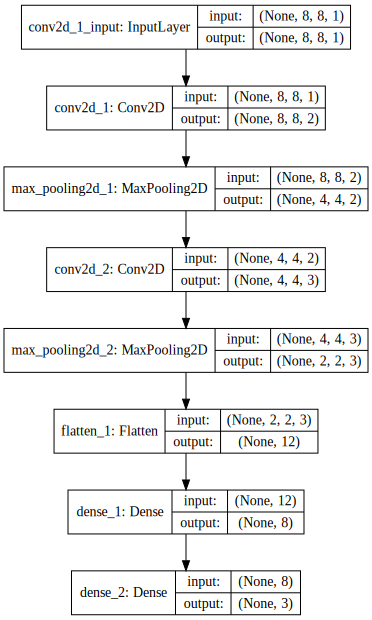

In [3]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

![model](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_model.svg)

---

### 요약

컨볼루션 신경망 모델에서 사용되는 주요 레이어의 원리와 역할에 대해서 알아보았고 레이어를 조합하여 간단한 컨볼루션 신경망 모델을 만들어봤습니다.

---

### 같이 보기

* [강좌 목차](https://tykimos.github.io/lecture/)
* 이전 : [딥러닝 이야기/다층 퍼셉트론 모델 만들어보기](https://tykimos.github.io/2017/02/04/MLP_Getting_Started/)
* 다음 : [딥러닝 이야기/컨볼루션 신경망 모델 만들어보기](https://tykimos.github.io/2017/03/08/CNN_Getting_Started/)